In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv("./data/plant_small.csv")
print(df)

    Color Intensity  Spots  Plant Health
0         97.861832      0             1
1         96.366280      0             1
2         94.466888      0             1
3         92.559662      2             1
4         89.177300      2             1
5         87.001213      2             1
6         83.261986      2             1
7         79.915855      2             1
8         79.172501      2             1
9         78.052917      2             1
10        77.815674      2             1
11        71.518936      3             1
12        64.589409      3             1
13        63.992104      3             1
14        60.276337      3             1
15        56.804455      4             1
16        54.881351      4             1
17        54.488319      4             1
18        52.889492      4             1
19        52.184834      4             1
20        46.147938      4             1
21        43.758720      4             1
22        42.365479      4             1
23        41.466

In [38]:
feature_count = df.shape[1] - 1
rows_list = []
for i in range(len(df)):
    new_row = np.array(df.iloc[i,0:feature_count])
    rows_list.append(new_row)
    
x = np.array(rows_list)
y = np.array(df.iloc[:,feature_count])
print(x.shape)
print(y.shape)

(30, 2)
(30,)


In [39]:
n = len(y)
randy = np.random.default_rng()
idx = np.arange(n)
randy.shuffle(idx)

## Splits the data into 80% training and 20% validation
train_idx = idx[:int(n*.8)]
val_idx = idx[int(n*.8):]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

training_lenth = len(x_train)
validation_length = len(x_val)
print(f"The training data has {training_lenth} observations.")
print(f"The validation data has {validation_length} observations.")

The training data has 24 observations.
The validation data has 6 observations.


In [40]:
x_train[:,1] 

array([ 2.,  2.,  0.,  0.,  4.,  3.,  6.,  4.,  9.,  4.,  4.,  0.,  8.,
        3.,  2.,  4.,  2.,  2.,  8.,  4.,  3.,  2.,  2., 10.])

In [41]:
pos = y_train == 1 ##y_train = 1 is Ture
neg = y_train == 0
print(pos)

[ True  True  True  True  True  True  True  True False  True  True  True
 False  True  True  True  True  True False  True  True  True  True False]


In [42]:
x_train[pos,1]

array([2., 2., 0., 0., 4., 3., 6., 4., 4., 4., 0., 3., 2., 4., 2., 2., 4.,
       3., 2., 2.])

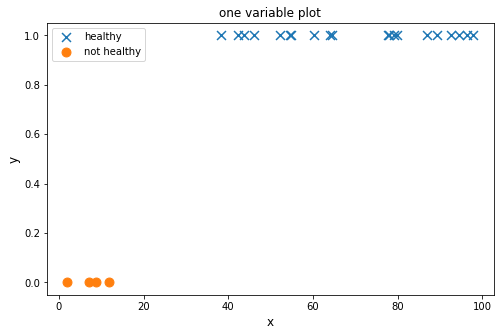

In [47]:
fig, ax = plt.subplots(figsize = (8,5))

ax.scatter(x_train[pos, 0],y_train[pos], marker = 'x', s=80, label="healthy")
ax.scatter(x_train[neg, 0],y_train[neg], marker = 'o', s=80, label = "not healthy")


ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend()

plt.show()

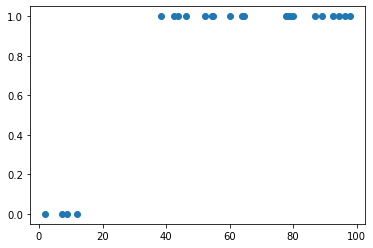

In [44]:
plt.scatter(x_train[:,0],y_train)

In [115]:
def linear_function(w, x, b):
    y = (w * x) + b
    return y

def sigmoid(z):
    return 1/(1 + np.exp((-z*.5)+15)) ## Adjust this function to get a line to fit the data, this is the log regression

In [116]:
z = np.linspace(-10, 100, 100)

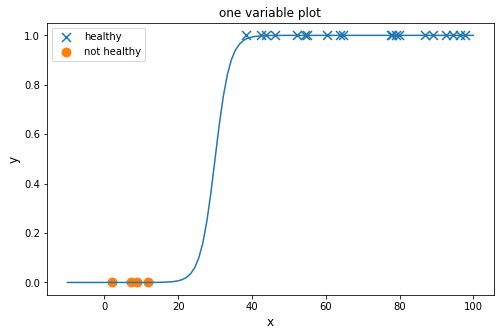

In [117]:
y = sigmoid(z)

fig, ax = plt.subplots(figsize = (8,5))

ax.scatter(x_train[pos, 0],y_train[pos], marker = 'x', s=80, label="healthy")
ax.scatter(x_train[neg, 0],y_train[neg], marker = 'o', s=80, label = "not healthy")
plt.plot(z, y)

ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend()

plt.show()

In [152]:
def sigmoid(z):
    return 1/(1 + np.exp((-z*.2)+5))

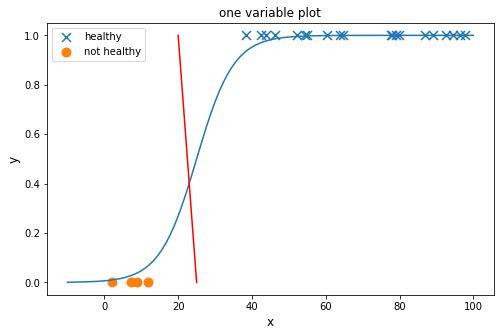

In [179]:
z = np.linspace(-10, 100, 100)
z2 = np.array([20,25])
y = sigmoid(z)
line = (.2 *-z2) + 5

fig, ax = plt.subplots(figsize = (8,5))

ax.scatter(x_train[pos, 0],y_train[pos], marker = 'x', s=80, label="healthy")
ax.scatter(x_train[neg, 0],y_train[neg], marker = 'o', s=80, label = "not healthy")
plt.plot(z, y)
plt.plot(z2, line, 'r')

ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend()

plt.show()

In [161]:
loss = -(np.log(1-pred1))
loss

3.048587351573745

In [159]:
pred1 = sigmoid(40)
pred1

0.9525741268224334